In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser
%matplotlib inline


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
import pickle
from lightgbm import LGBMClassifier
print('Library Loaded')

Library Loaded


In [88]:
data = pd.read_csv('heart.csv')

In [89]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [90]:
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [142]:
data.info()

&lt;class &#39;pandas.core.frame.DataFrame&#39;&gt;
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [92]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [93]:
cols = data.columns
cols

Index([&#39;age&#39;, &#39;sex&#39;, &#39;cp&#39;, &#39;trestbps&#39;, &#39;chol&#39;, &#39;fbs&#39;, &#39;restecg&#39;, &#39;thalach&#39;,
       &#39;exang&#39;, &#39;oldpeak&#39;, &#39;slope&#39;, &#39;ca&#39;, &#39;thal&#39;, &#39;target&#39;],
      dtype=&#39;object&#39;)

In [94]:
for col in cols:
    print('rows in {1} with Zero value: {0}'.format(len(data.loc[data[col] == 1 ]),col))

rows in age with Zero value: 0
rows in sex with Zero value: 207
rows in cp with Zero value: 50
rows in trestbps with Zero value: 0
rows in chol with Zero value: 0
rows in fbs with Zero value: 45
rows in restecg with Zero value: 152
rows in thalach with Zero value: 0
rows in exang with Zero value: 99
rows in oldpeak with Zero value: 14
rows in slope with Zero value: 140
rows in ca with Zero value: 65
rows in thal with Zero value: 18
rows in target with Zero value: 165


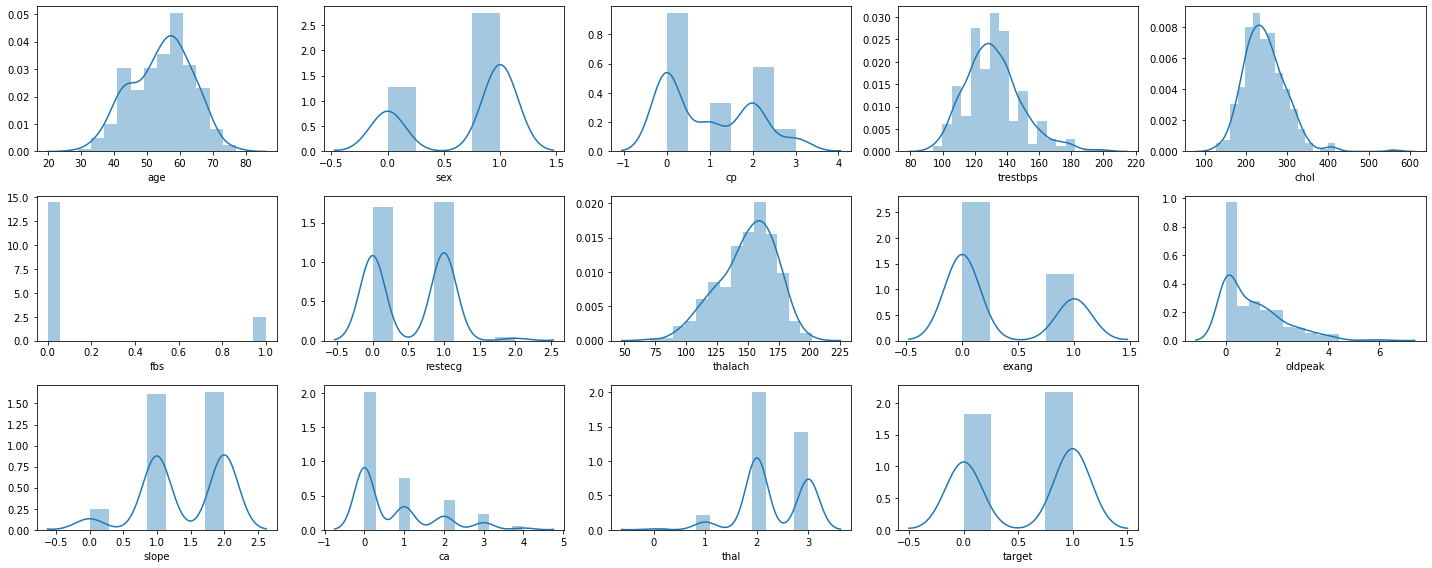

In [95]:
num_cols = data.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(20,8))

for col in range(len(num_cols.columns)):
    fig.add_subplot(3,5,col+1)
    sns.distplot(num_cols.iloc[:,col])
    plt.xlabel(num_cols.columns[col])

plt.tight_layout()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fe1819802e0&gt;

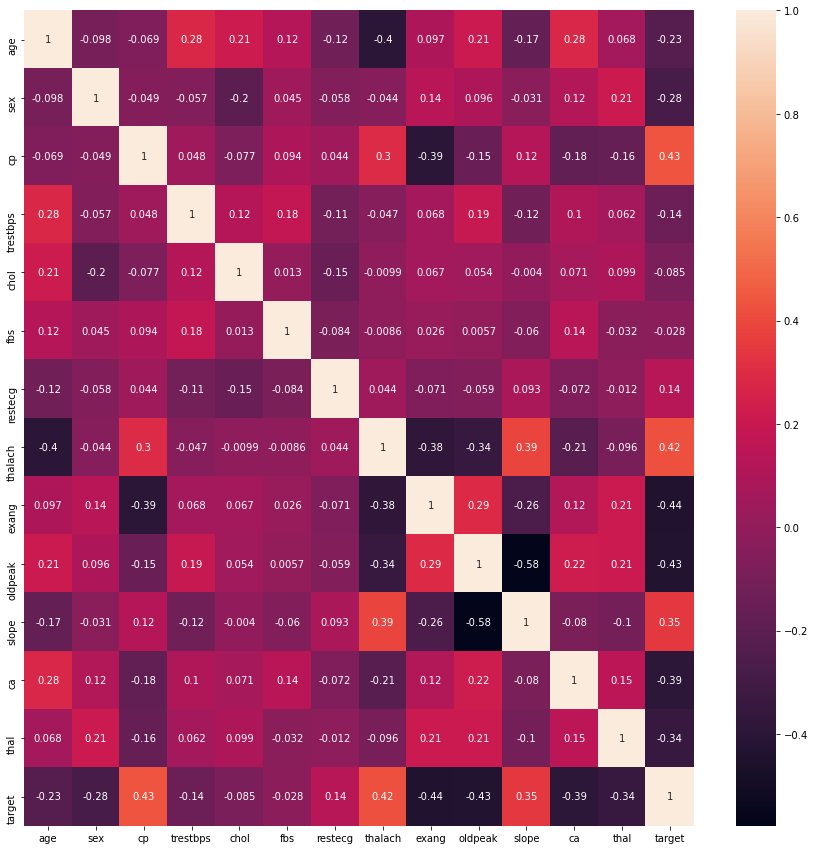

In [96]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

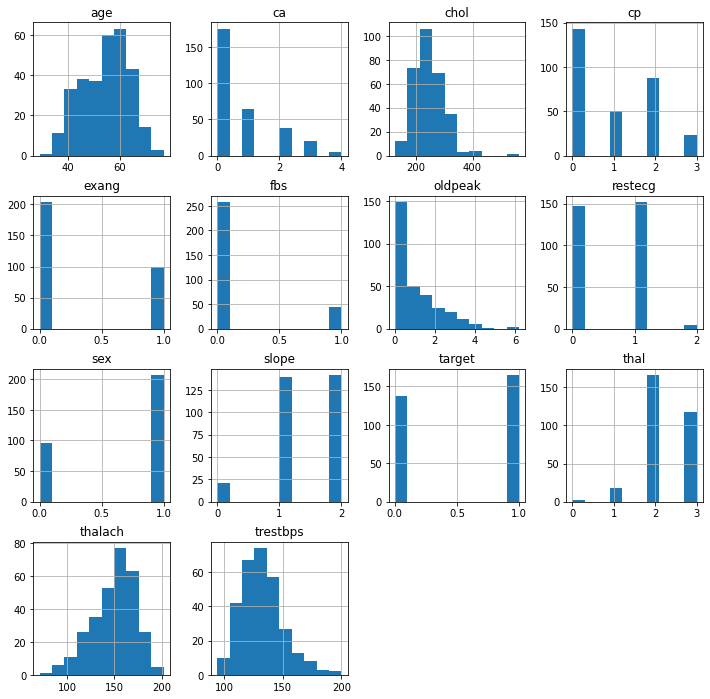

In [97]:
data.hist(figsize=(12,12))
plt.show()

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fe17e3fe070&gt;

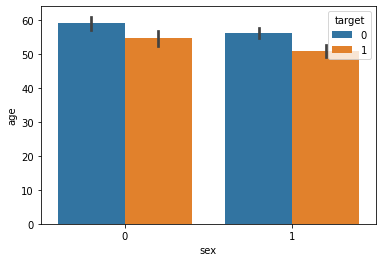

In [98]:
sns.barplot(data.sex,data.age,hue=data.target)

In [99]:
X=data.drop('target',axis=1)
from sklearn.manifold import TSNE
import time
time_start = time.time()

df_tsne = TSNE(random_state=10).fit_transform(X)

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 1.4752821922302246 seconds


In [100]:
import matplotlib.patheffects as PathEffects
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("deep", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

(&lt;Figure size 576x576 with 1 Axes&gt;,
 &lt;matplotlib.axes._subplots.AxesSubplot at 0x7fe17e131070&gt;,
 &lt;matplotlib.collections.PathCollection at 0x7fe17e25b160&gt;,
 [Text(-1.3534312, -3.0909379, &#39;0&#39;), Text(2.6605806, 3.761572, &#39;1&#39;)])

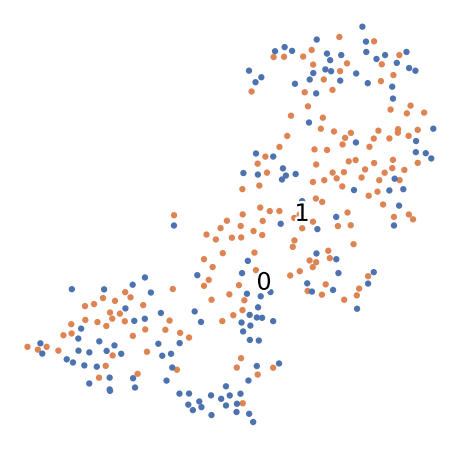

In [101]:
fashion_scatter(df_tsne, data.target)

In [102]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

&lt;matplotlib.axes._subplots.AxesSubplot at 0x7fe17e0c44c0&gt;

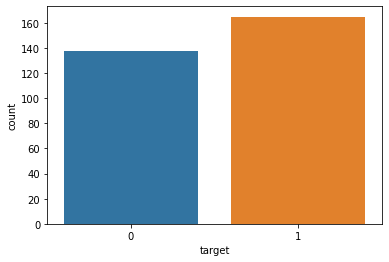

In [103]:
sns.countplot(data.target)

In [104]:
X = data.drop('target',axis=1) # predictor feature coloumns
y = data.target


X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.15, random_state = 10)

print('Training Set :',len(X_train))
print('Test Set :',len(X_test))
print('Training labels :',len(y_train))
print('Test Labels :',len(y_test))

Training Set : 257
Test Set : 46
Training labels : 257
Test Labels : 46


In [105]:
from sklearn.impute import SimpleImputer

In [158]:

#impute with mean all 0 readings

fill = SimpleImputer(missing_values = 0 , strategy ="mean")

X_train = fill.fit_transform(X_train)
X_test = fill.fit_transform(X_test)

In [159]:
def FitModel(X_train,y_train,X_test,y_test,algo_name,algorithm,gridSearchParams,cv):
    np.random.seed(10)
   
    
    grid = GridSearchCV(
        estimator=algorithm,
        param_grid=gridSearchParams,
        cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)
    
    
    grid_result = grid.fit(X_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict(X_test)
    cm = confusion_matrix(y_test, pred)
   # metrics =grid_result.gr
    print(pred)
    pickle.dump(grid_result,open('logisticegression.pkl','wb'))
   
    print('Best Params :',best_params)
    print('Classification Report :',classification_report(y_test,pred))
    print('Accuracy Score : ' + str(accuracy_score(y_test,pred)))
    sns.heatmap(cm,annot=True)

1. Logistic Regression

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.5s finished
[0 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
Best Params : {&#39;C&#39;: 1.0, &#39;penalty&#39;: &#39;l2&#39;}
Classification Report :               precision    recall  f1-score   support

           0       0.94      0.94      0.94        18
           1       0.92      0.92      0.92        13

    accuracy                           0.94        31
   macro avg       0.93      0.93      0.93        31
weighted avg       0.94      0.94      0.94        31

Accuracy Score : 0.9354838709677419


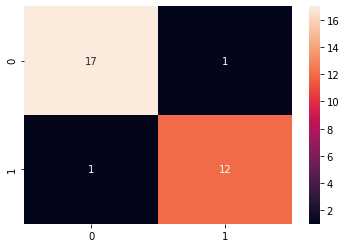

In [160]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

FitModel(X_train,y_train,X_test,y_test,'LogisticRegression',LogisticRegression(),hyperparameters,cv=5)

In [161]:
X_test.shape

(31, 13)

2. XGBoost

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 240 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 490 tasks      | elapsed:   31.7s
[Parallel(n_jobs=-1)]: Done 840 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 1290 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1350 out of 1350 | elapsed:  1.3min finished
[0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1
 0 1 0 0 0 1 1 1 1]
Best Params : {&#39;learning_rate&#39;: 0.08, &#39;max_depth&#39;: 2, &#39;n_estimators&#39;: 100}
Classification Report :               precision    recall  f1-score   support

           0       0.85      0.85      0.85        27
           1       0.79      0.79      0.79        19

    accuracy                           0.83        46
   macro avg       0.82      0.82      0

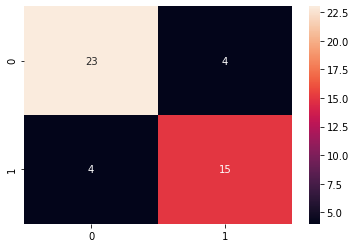

In [109]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
            'max_depth' :[2,3,4,5,6,7],
    'learning_rate':np.arange(0.01,0.1,0.01).tolist()
           
        }

FitModel(X_train,y_train,X_test,y_test,'XGBoost',XGBClassifier(),param,cv=5)

3. Random forest

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   57.2s finished
[0 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1
 0 1 0 0 0 1 1 1 1]
Best Params : {&#39;max_depth&#39;: 6, &#39;n_estimators&#39;: 100}
Classification Report :               precision    recall  f1-score   support

           0       0.88      0.81      0.85        27
           1       0.76      0.84      0.80        19

    accuracy                           0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46

Accuracy Score : 0.8260869565217391


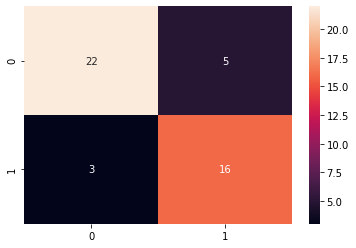

In [110]:
param ={
            'n_estimators': [100, 500, 1000,1500, 2000],
    'max_depth' :[2,3,4,5,6,7],
           
        }
FitModel(X_train,y_train,X_test,y_test,'Random Forest',RandomForestClassifier(),param,cv=5)

4. SVC

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 125 out of 140 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:    0.3s finished
[1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 0
 1 1 1 0 0 1 1 1 1]
Best Params : {&#39;C&#39;: 1000, &#39;gamma&#39;: 0.0001}
Classification Report :               precision    recall  f1-score   support

           0       0.86      0.70      0.78        27
           1       0.67      0.84      0.74        19

    accuracy                           0.76        46
   macro avg       0.77      0.77      0.76        46
weighted avg       0.78      0.76      0.76        46

Accuracy Score : 0.7608695652173914


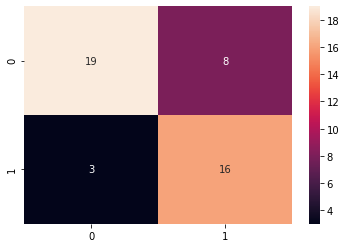

In [111]:
param ={
            'C': [0.1, 1, 100, 1000],
            'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
        }

FitModel(X_train,y_train,X_test,y_test,'SVC',SVC(),param,cv=5)

In [148]:
X.shape

(303, 13)